In [148]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from scipy.signal import convolve2d

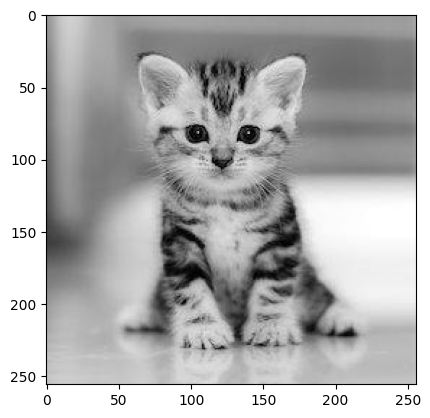

In [149]:
img = Image.open('kitten.jpg')
img_array = np.array(img)

plt.imshow(img_array, cmap='gray')

In [150]:
img_array

array([[150, 153, 158, ..., 157, 161, 164],
       [150, 153, 158, ..., 158, 161, 164],
       [149, 153, 157, ..., 158, 162, 165],
       ...,
       [196, 197, 198, ..., 197, 198, 199],
       [196, 196, 197, ..., 197, 198, 199],
       [196, 196, 197, ..., 197, 198, 199]], shape=(256, 256), dtype=uint8)

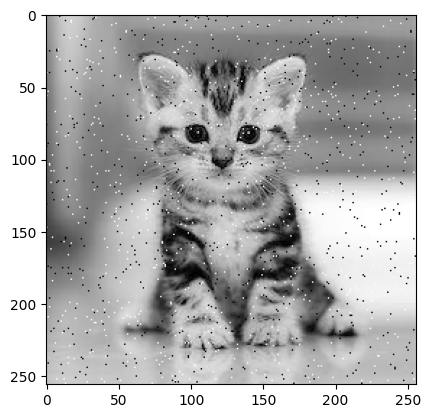

In [151]:
## Adiciona ruido na imagem:
def sp_noise(image,prob):
    '''
    Add salt and pepper noise to image
    prob: Probability of the noise
    '''
    output = np.zeros(image.shape,np.uint8)
    thres = 1 - prob 
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            rdn = np.random.random()
            if rdn < prob:
                output[i][j] = 0
            elif rdn > thres:
                output[i][j] = 255
            else:
                output[i][j] = image[i][j]
    return output

img_sp = sp_noise(img_array, prob=0.01)
plt.imshow(img_sp, cmap='gray')

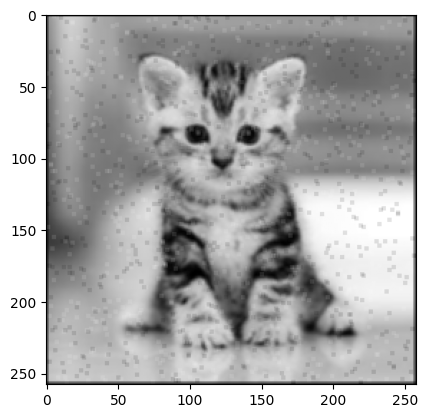

In [152]:
## Filtro de blur:
filter_size = 3
blur_filter = np.full((filter_size,filter_size), 1.0/(filter_size**2))

## Usa o filtro atravez de convolução

img_blur = convolve2d(img_sp, blur_filter)
plt.imshow(img_blur, cmap='gray')

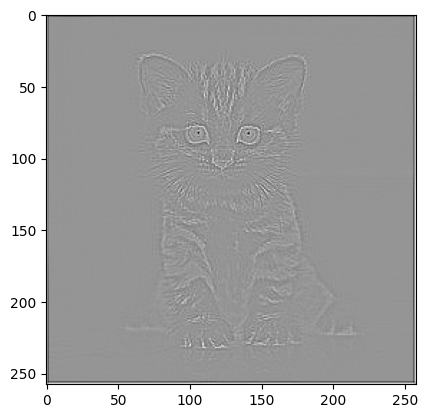

In [153]:
# Filtro de detecção de Borda:
#   serve para identificar onde os objetos começam e terminam (ou seja, objeto a ser observado)
#   regiões não homogêneas -> borda
#   regiões homogêneas -> interno


# aquele -8 (no centro) -> verifica a diferença entre o centro e o restante da imagem
# filtro de LaPlace

filtro_borda = np.array([
    [1, 1, 1],
    [1, -8, 1],
    [1, 1, 1]
])

img_borda = convolve2d(img_array, filtro_borda)
plt.imshow(img_borda, cmap='gray')

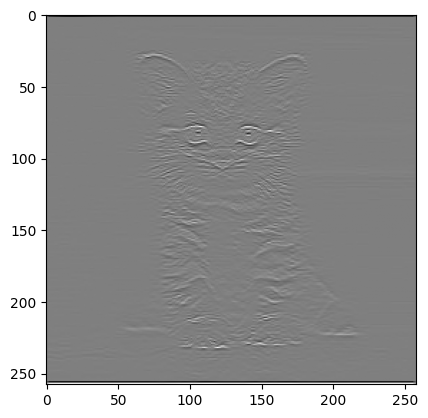

In [154]:
# criando filtro que detecta bordas horizontais


filtro_borda = np.array([
    [3, 3, 3],
    [-6, -6, -6],
    [3, 3, 3]
])

img_borda = convolve2d(img_array, filtro_borda)
plt.imshow(img_borda, cmap='gray')


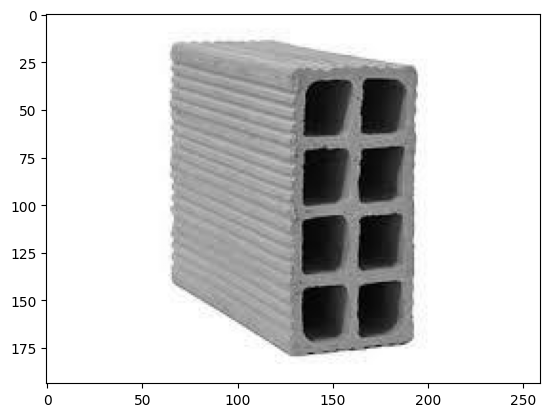

In [155]:

img2 = Image.open('bloco.jpg')
img_array2 = np.array(img2)

plt.imshow(img_array2, cmap='gray')


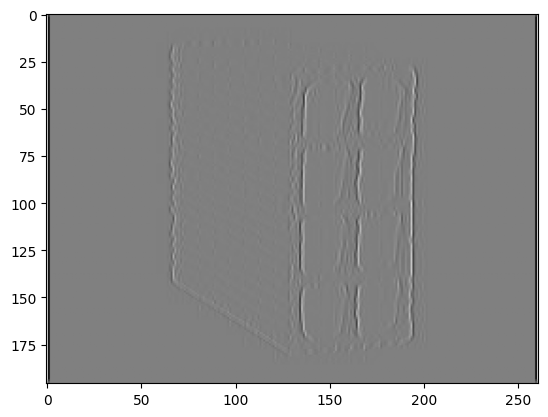

In [156]:
# bordas verticais

filtro_borda = np.array([
    [1, -2, 1],
    [1, -2, 1],
    [1, -2, 1]
])

img_borda2 = convolve2d(img_array2, filtro_borda)
plt.imshow(img_borda2, cmap='gray')

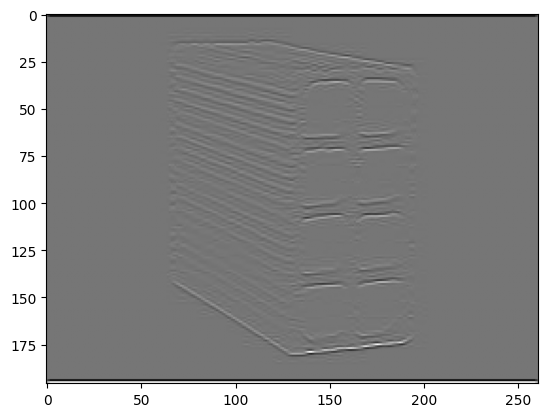

In [157]:
# bordas horizontais

filtro_borda = np.array([
    [3, 3, 3],
    [-6, -6, -6],
    [3, 3, 3]
])

img_borda2 = convolve2d(img_array2, filtro_borda)
plt.imshow(img_borda2, cmap='gray')